In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_curve, 
    roc_auc_score, 
    confusion_matrix, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    classification_report
)
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import RobustScaler
import seaborn as sns
from sklearn.preprocessing import label_binarize
from itertools import cycle


In [27]:
# Load dataset
df = pd.read_excel('Dry_Bean_Dataset.xlsx')

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Encode class labels to integers
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

X = df.drop('Class', axis=1)

y = df['Class']
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# 计算每个特征的平均值和方差# 按 Class 分组计算每个特征的平均值和方差
class_means = df.groupby('Class').mean()  # 每个 Class 的平均值
class_variances = df.groupby('Class').var()  # 每个 Class 的方差

# 打印结果

# Combine scaled features and labels into a DataFrame
scaled_df = pd.DataFrame(X_scaled, columns=df.columns[:-1])
scaled_df['Class'] = y

Missing values:
 Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [34]:

print("\nClass-wise Feature Variances:")
print(class_variances)
print("maximum variance feature:", class_variances.idxmax(axis=1))


Class-wise Feature Variances:
               Area     Perimeter  MajorAxisLength  MinorAxisLength  \
Class                                                                 
0      1.053782e+08   8033.473531      1040.888925       393.636472   
1      5.441810e+08  13433.031240      2829.888446       542.857957   
2      8.798218e+07   4571.806803       870.749760       215.216058   
3      2.186619e+07   2546.969401       427.010480       157.500699   
4      5.389612e+07   4906.431925       913.255794       181.755525   
5      2.284723e+07   2289.528110       398.781084       119.744797   
6      2.067312e+07   1969.325618       431.234375        83.847598   

       AspectRation  Eccentricity    ConvexArea  EquivDiameter    Extent  \
Class                                                                      
0          0.015890      0.002511  1.091033e+08     483.907580  0.001635   
1          0.014121      0.001695  5.675472e+08     983.861529  0.001506   
2          0.008372      

In [ ]:

print("Class-wise Feature Means:")
print(class_means)

Class-wise Feature Means:
                Area    Perimeter  MajorAxisLength  MinorAxisLength  \
Class                                                                 
0       69804.133132  1046.105764       370.044279       240.309352   
1      173485.059387  1585.619079       593.152075       374.352547   
2       75538.211043  1057.634282       409.499538       236.370616   
3       32118.710942   665.209536       246.557279       165.657143   
4       53648.508817   919.859676       372.570290       184.170663   
5       39881.299951   727.672440       251.291957       201.909653   
6       44729.128604   796.418737       299.380258       190.800250   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter    Extent  \
Class                                                                       
0          1.544395      0.754665   71025.729198     297.311018  0.749273   
1          1.585550      0.770518  175813.116858     468.941426  0.776559   
2          1.733663      0

## distribution of the dataset

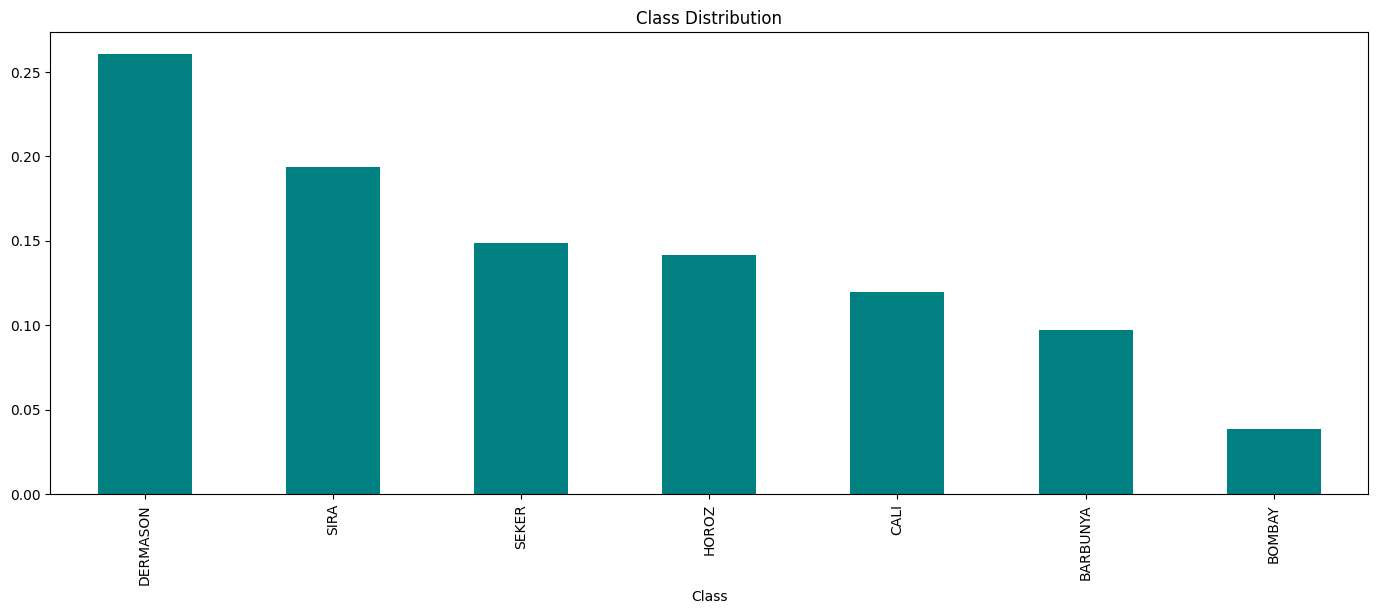

In [9]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx')
class_dist = df['Class'].value_counts(normalize=True)

plt.figure(figsize=(17,6))
class_dist.plot(kind='bar', color='teal')
plt.title('Class Distribution')
plt.show()

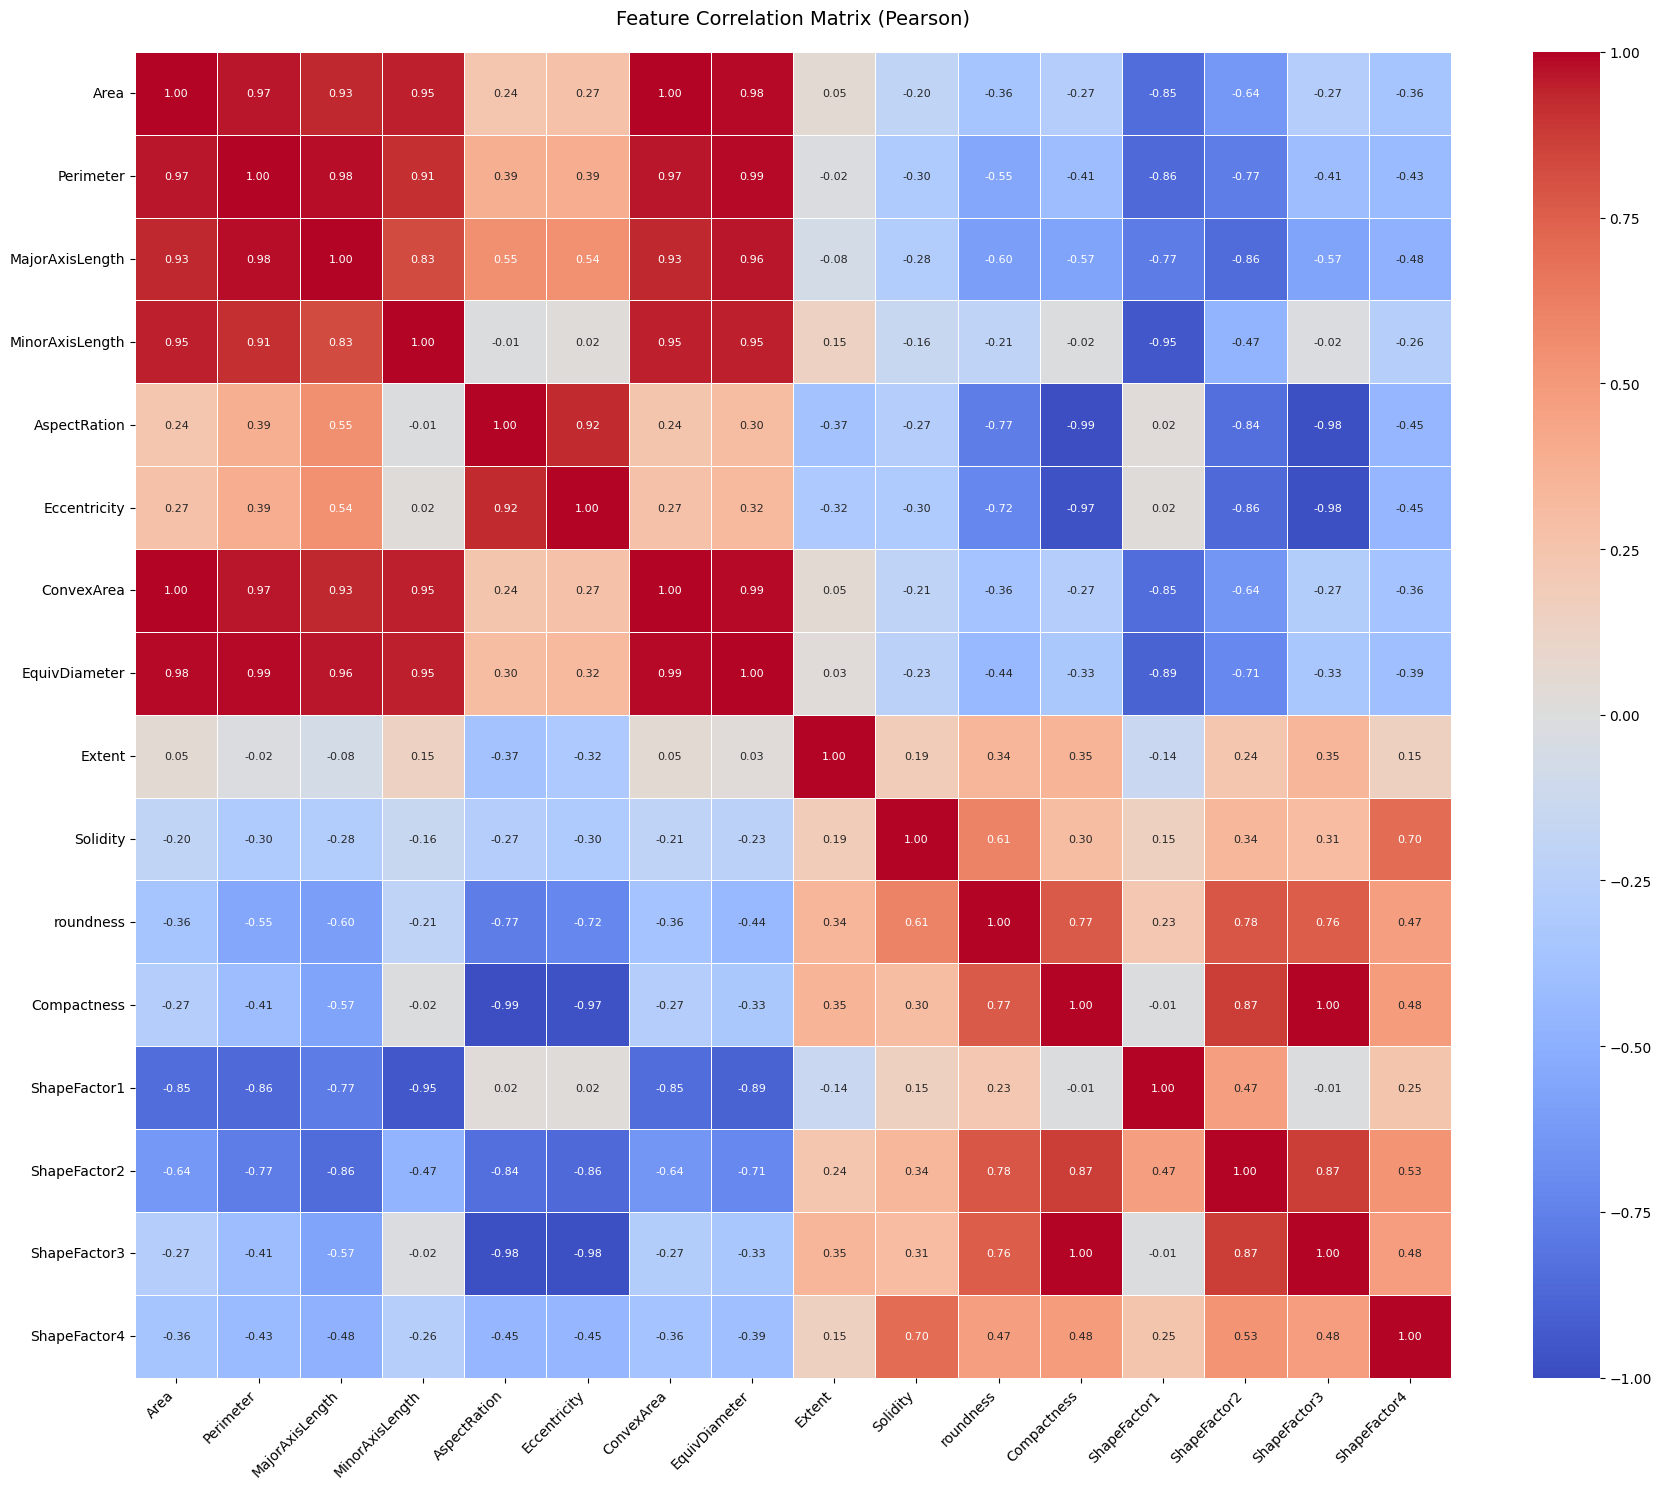

In [10]:

# Encode class labels to integers
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

# Separate features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# 计算相关系数矩阵
corr_matrix = X.corr()

# 绘制热力图（优化版）
plt.figure(figsize=(18, 15))
sns.heatmap(
    corr_matrix,
    annot=True,         # 显示数值
    fmt=".2f",         # 小数格式
    cmap='coolwarm',   # 冷暖色区分正负相关
    vmin=-1, vmax=1,   # 固定色标范围
    linewidths=0.5,    # 单元格间线条
    annot_kws={"size":8} # 注释字体大小
)

plt.title("Feature Correlation Matrix (Pearson)", fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## Drop the rebundant data

In [13]:
X = X.drop(columns=[ 'Eccentricity', 'ConvexArea', 'EquivDiameter',  'Compactness'])
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Combine scaled features and labels into a DataFrame
scaled_df = pd.DataFrame(X_scaled, columns=X.columns )
scaled_df['Class'] = y

scaled_df.to_csv('Dry_Bean_Dataset.csv', index=False)


## Splitting the Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

/var/folders/1w/40d8xs916bvg7lwh2140wmxh0000gn/T/ipykernel_37657/2353648841.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = scaled_df.groupby('Class', group_keys=False).apply(


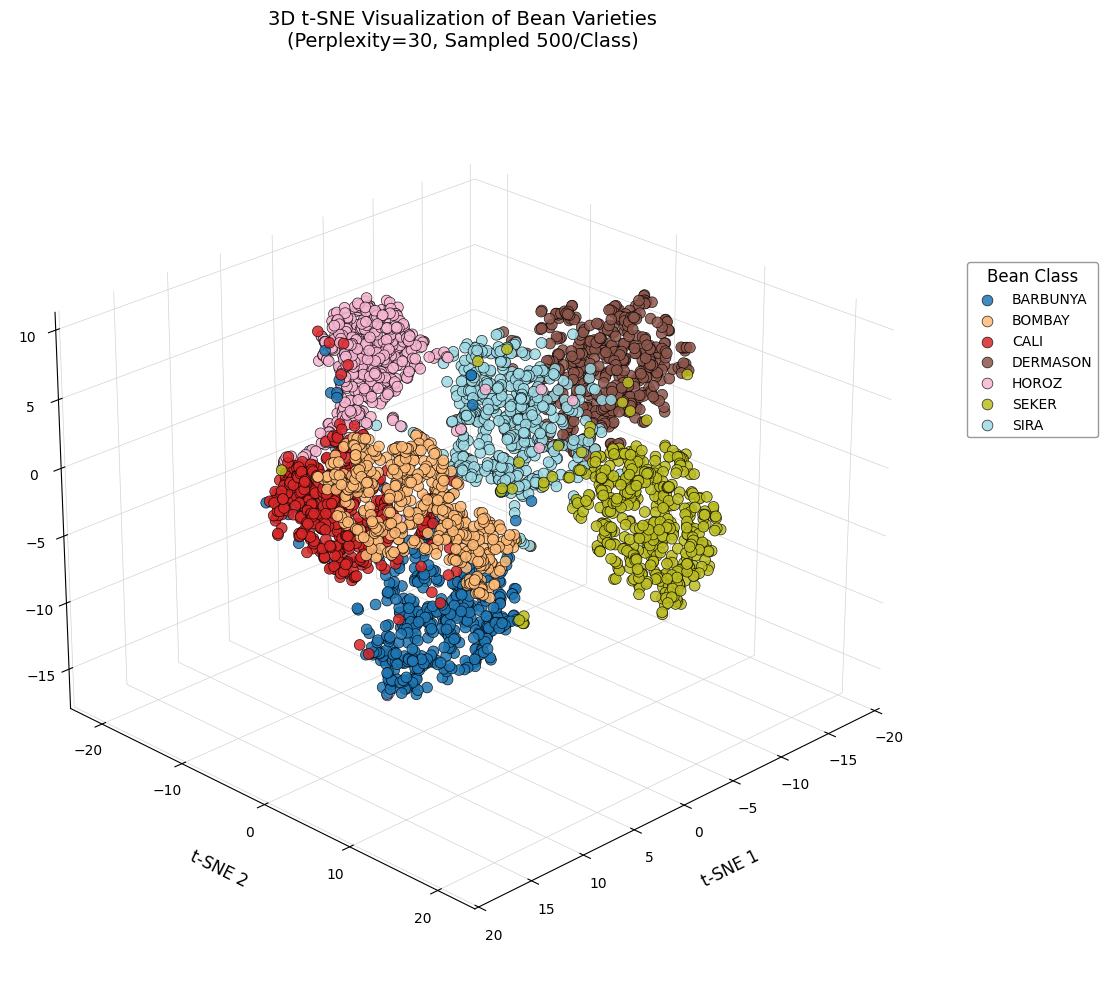

In [4]:
# Sample 200 instances per class
sampled_df = scaled_df.groupby('Class', group_keys=False).apply(
    lambda x: x.sample(n=500, random_state=42)
)

# Extract sampled features and labels
X_sampled = sampled_df.drop('Class', axis=1).values
y_sampled = sampled_df['Class'].values

# Run t-SNE for 3D projection
tsne = TSNE(n_components=3, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_sampled)

# Create DataFrame for plotting
tsne_df = pd.DataFrame({
    'X': X_tsne[:, 0],
    'Y': X_tsne[:, 1],
    'Z': X_tsne[:, 2],
    'Class': y_sampled
})

# Map class labels to colors and names
class_names = label_encoder.classes_
colors = plt.cm.viridis(np.linspace(0, 1, len(class_names)))

# 创建可视化画布
fig = plt.figure(figsize=(12, 10))  # 增大画布尺寸
ax = fig.add_subplot(111, projection='3d')

# 使用更鲜明的颜色映射
colors = plt.cm.tab20(np.linspace(0, 1, len(class_names)))  # 改用高对比度的tab20色系

# 添加边缘线增强标记区分度
edge_colors = ['k'] * len(class_names)  # 黑色边缘线

# 绘制每个类别
for i, (cls, color) in enumerate(zip(np.unique(y_sampled), colors)):
    mask = tsne_df['Class'] == cls
    ax.scatter(
        tsne_df[mask]['X'], 
        tsne_df[mask]['Y'], 
        tsne_df[mask]['Z'],
        color=color,
        edgecolor=edge_colors[i],  # 添加边缘线
        linewidths=0.5,            # 边缘线宽度
        label=f'{class_names[i]}',
        alpha=0.85,                # 微调透明度
        s=60,                      # 增大标记尺寸
        depthshade=True            # 启用深度阴影
    )

# 增强坐标轴可视化
ax.set_xlabel('t-SNE 1', fontsize=12, labelpad=15)  # 添加坐标轴标签
ax.set_ylabel('t-SNE 2', fontsize=12, labelpad=15)
ax.set_zlabel('t-SNE 3', fontsize=12, labelpad=15)
ax.xaxis.pane.fill = False        # 透明背景面板
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')  # 白色网格线
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.grid(True, linestyle='--', alpha=0.4)  # 虚线网格

# 优化标题和图例
ax.set_title(
    '3D t-SNE Visualization of Bean Varieties\n(Perplexity=30, Sampled 500/Class)', 
    fontsize=14, 
    pad=20  # 标题与图形的间距
)
legend = ax.legend(
    loc='upper left',
    bbox_to_anchor=(1.05, 0.8),  # 将图例移到画布右侧
    title='Bean Class',
    fontsize=10,
    title_fontsize=12,
    frameon=True,
    edgecolor='gray'
)

# 设置视角角度
ax.view_init(elev=25, azim=45)  # 调整仰角和方位角



# 添加背景网格（可选）
ax.xaxis._axinfo["grid"].update({"linewidth":0.5, "color" : "lightgray"})
ax.yaxis._axinfo["grid"].update({"linewidth":0.5, "color" : "lightgray"})
ax.zaxis._axinfo["grid"].update({"linewidth":0.5, "color" : "lightgray"})

plt.tight_layout()
plt.show()

Epoch [1/200] | Train Loss: 0.9078, Acc: 0.7128 | Val Loss: 0.3432, Acc: 0.8924
Epoch [2/200] | Train Loss: 0.3624, Acc: 0.8778 | Val Loss: 0.2444, Acc: 0.9100
Epoch [3/200] | Train Loss: 0.2964, Acc: 0.8985 | Val Loss: 0.2307, Acc: 0.9130
Epoch [4/200] | Train Loss: 0.2744, Acc: 0.9072 | Val Loss: 0.2247, Acc: 0.9152
Epoch [5/200] | Train Loss: 0.2694, Acc: 0.9053 | Val Loss: 0.2247, Acc: 0.9174
Epoch [6/200] | Train Loss: 0.2560, Acc: 0.9139 | Val Loss: 0.2237, Acc: 0.9166
Epoch [7/200] | Train Loss: 0.2512, Acc: 0.9153 | Val Loss: 0.2226, Acc: 0.9166
Epoch [8/200] | Train Loss: 0.2418, Acc: 0.9164 | Val Loss: 0.2173, Acc: 0.9196
Epoch [9/200] | Train Loss: 0.2372, Acc: 0.9189 | Val Loss: 0.2130, Acc: 0.9218
Epoch [10/200] | Train Loss: 0.2393, Acc: 0.9161 | Val Loss: 0.2123, Acc: 0.9214
Epoch [11/200] | Train Loss: 0.2405, Acc: 0.9164 | Val Loss: 0.2118, Acc: 0.9218
Epoch [12/200] | Train Loss: 0.2297, Acc: 0.9188 | Val Loss: 0.2137, Acc: 0.9207
Epoch [13/200] | Train Loss: 0.2333, 

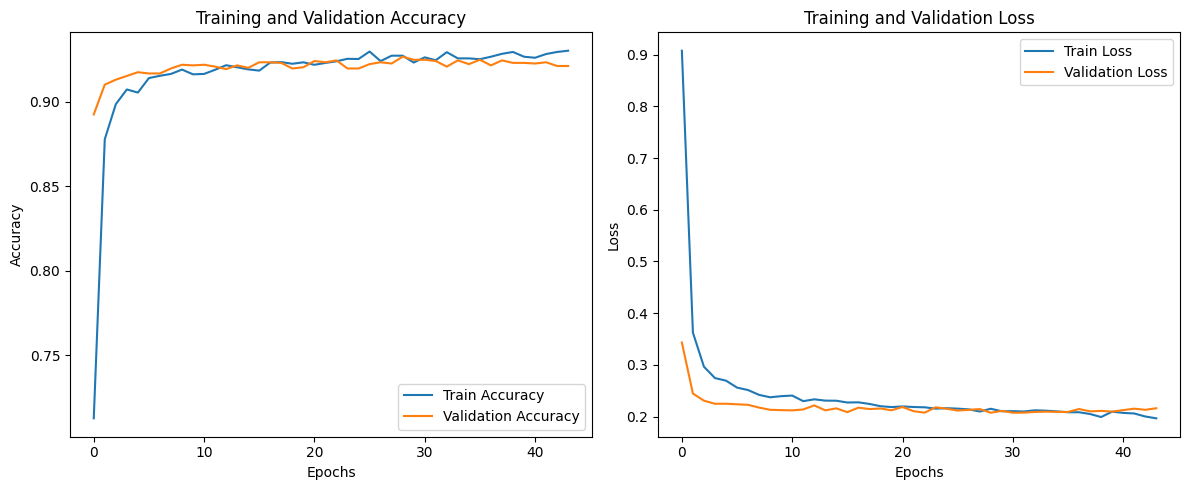


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       265
           1       1.00      0.98      0.99       105
           2       0.94      0.94      0.94       326
           3       0.90      0.94      0.92       709
           4       0.97      0.96      0.96       385
           5       0.92      0.97      0.95       405
           6       0.92      0.85      0.88       527

    accuracy                           0.93      2722
   macro avg       0.94      0.94      0.94      2722
weighted avg       0.93      0.93      0.93      2722



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# 划分数据集（70%训练，20%测试，10%验证）
# 第一次分割：分出训练集（70%）
X_train, X_temp, y_train, y_temp = train_test_split(
    scaled_df.drop('Class', axis=1), 
    scaled_df['Class'],
    test_size=0.4,
    random_state=42,
    stratify=scaled_df['Class']
)

# 第二次分割：从剩余30%中分出测试集（20%）和验证集（10%）
X_test, X_val, y_test, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

# 获取类别数量
num_classes = len(np.unique(y))

# 转换为PyTorch Tensor
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# 创建DataLoader
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# 定义神经网络模型
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, num_classes)
        )
    
    def forward(self, x):
        return self.model(x)

# 初始化模型
input_size = X_train.shape[1]
num_classes = len(np.unique(y))
model = NeuralNetwork(input_size, num_classes)

# 定义优化器和损失函数
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)


criterion = nn.CrossEntropyLoss()

# 早停法实现
class EarlyStopping:
    def __init__(self, patience=15, delta=0):
        self.patience = patience
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.delta = delta
        
    def __call__(self, val_loss):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0

early_stopping = EarlyStopping(patience=15)

# 训练参数
train_losses = []
val_losses = []
train_accs = []
val_accs = []

# 训练循环
for epoch in range(100):
    # 训练模式
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    # 验证模式
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            val_running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    val_loss = val_running_loss / len(val_loader)
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    # 早停检查
    early_stopping(val_loss)
    if early_stopping.early_stop:
        print(f"Early stopping at epoch {epoch+1}")
        break
    
    print(f"Epoch [{epoch+1}/200] | "
          f"Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")

# 测试集评估
model.eval()
test_correct = 0
test_total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

test_acc = test_correct / test_total
print(f"\nTest Accuracy: {test_acc:.4f}")

# 绘制训练曲线
plt.figure(figsize=(12, 5))

# 准确率曲线
plt.subplot(1, 2, 1)
plt.plot(train_accs, label='Train Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 损失曲线
plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 生成分类报告
print("\nClassification Report:")
print(classification_report(all_labels, all_preds))

/var/folders/1w/40d8xs916bvg7lwh2140wmxh0000gn/T/ipykernel_37657/2315613688.py:36: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


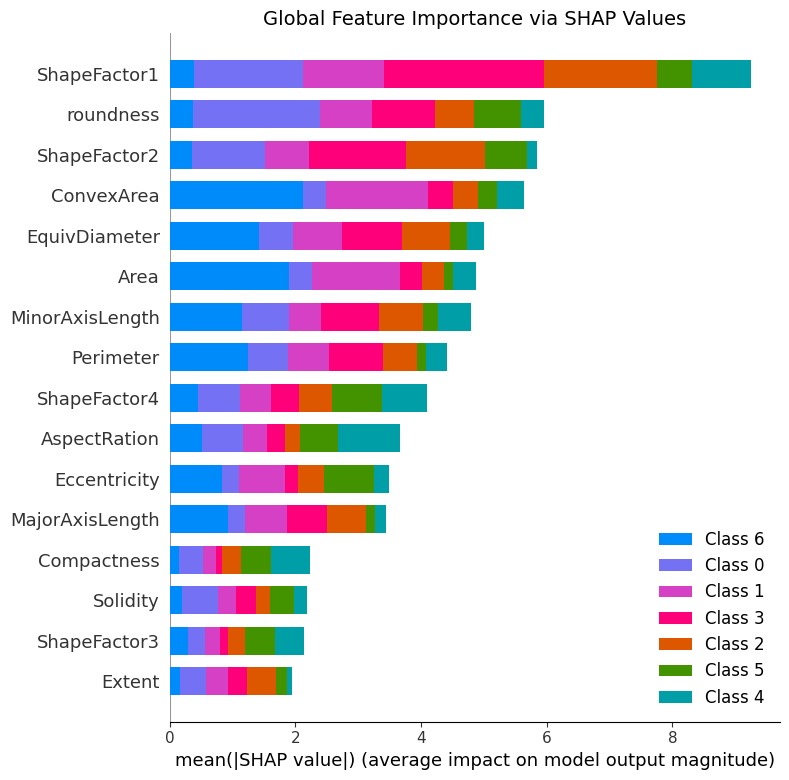


Feature Importance Ranking:
ConvexArea: 0.7796
Area: 0.6964
Perimeter: 0.6922
MinorAxisLength: 0.6869
MajorAxisLength: 0.5927
Eccentricity: 0.4325
AspectRation: 0.4300


In [ ]:


# 设置随机种子保证可重复性
np.random.seed(42)
torch.manual_seed(42)

# 从测试集中随机抽取100个样本用于解释
sample_idx = np.random.choice(X_test.index, size=100, replace=False)
X_sample = X_test.loc[sample_idx].values.astype(np.float32)

# 将模型设置为评估模式（但保持梯度计算）
model.eval()

# 创建带梯度的背景数据
background_data = torch.tensor(X_sample, dtype=torch.float32, requires_grad=True)

# 创建SHAP解释器
explainer = shap.DeepExplainer(
    model,
    background_data  # 使用带梯度的背景数据
)

# 准备测试数据（带梯度）
test_features = torch.tensor(X_test.values, dtype=torch.float32, requires_grad=True)

# 计算SHAP值时启用梯度
with torch.autograd.set_grad_enabled(True):  # 重要修改
    shap_values = explainer.shap_values(test_features)


# 获取特征名称（排除目标列）
feature_names = scaled_df.drop('Class', axis=1).columns.tolist()

# 绘制全局特征重要性（条形图）
plt.figure(figsize=(10, 8))
shap.summary_plot(
    shap_values, 
    features=test_features.detach().numpy(),  # 关键修改：添加.detach()
    feature_names=feature_names,
    plot_type="bar",
    show=False
)
plt.title("Global Feature Importance via SHAP Values", fontsize=14)
plt.tight_layout()
plt.show()

# 输出平均绝对SHAP值表格
print("\nFeature Importance Ranking:")
shap_means = np.abs(shap_values).mean(axis=1).mean(axis=0)
for name, importance in sorted(zip(feature_names, shap_means), 
                              key=lambda x: x[1], 
                              reverse=True):
    print(f"{name}: {importance:.4f}")

Accuracy: 0.9167


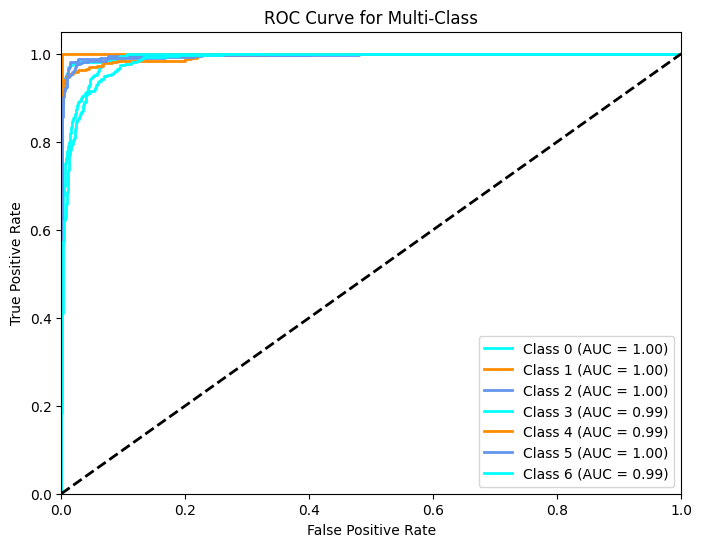

Confusion Matrix:
[[249   0  11   1   1   2   3]
 [  0   1   1   0   0   0   0]
 [ 11   2 305   0   0   1   2]
 [  0   0   0 612   0  10  47]
 [  0   0   7   4 299   0  11]
 [  1   0   0  16   0 359  10]
 [  1   0   1  56   5   4 465]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       267
           1       0.33      0.50      0.40         2
           2       0.94      0.95      0.94       321
           3       0.89      0.91      0.90       669
           4       0.98      0.93      0.96       321
           5       0.95      0.93      0.94       386
           6       0.86      0.87      0.87       532

    accuracy                           0.92      2498
   macro avg       0.84      0.86      0.85      2498
weighted avg       0.92      0.92      0.92      2498



In [14]:

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# LightGBM 数据集
train_data = lgb.Dataset(X_train, y_train)
test_data = lgb.Dataset(X_test, y_test, reference=train_data)

# 模型参数
params = {
    'objective': 'multiclass',
    'num_class': n_classes,
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 30,
    'max_depth': 2,
    'min_data_in_leaf': 5,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

# 模型训练
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, test_data],
    num_boost_round=200
)

# 模型预测
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# ROC 曲线和 AUC 计算
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred[:, i])

# 绘制所有类别的 ROC 曲线
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()

# 混淆矩阵
cm = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:')
print(cm)

# 分类报告
print('Classification Report:')
print(classification_report(y_test, y_pred_classes))